# Building  Recurrent Neural Network - Step by Step

By the end of this assignment, you'll be able to:

 * Define notation for building sequence models
 * Describe the architecture of a basic RNN
 * Identify the main components of an LSTM
 * Implement backpropagation through time for a basic RNN and an LSTM
 * Give examples of several types of RNN 

 **Notation**:
 - Superscript $[l]$ denotes an object associated with the $l^{th}$ layer. 
 
 - Superscript $(i)$ denotes an object associated with the $i^{th}$ example. 
 
 - Superscript $\langle t \rangle$ denotes an object at the $t^{th}$ time 
 step. 
     
 - Subscript $i$ denotes the $i^{th}$ entry of a vector.

 
 

 **Example**:  
 - $a^{(2)[3]<4>}_5$ denotes the activation of the 2nd training example (2), 3rd layer [3], 4th time step <4>, and 5th entry in the vector.

## Table of Content
 
 - [Packages](#0)
 - [1 - Forward Propagation for the Basic Recurrent Neural Network](#1)
     - [1.1 - RNN Cell](#1-1)
         - [Exercise 1 - rnn_cell_forward](#ex-1)
     - [1.2 - RNN Forward Pass](#1-2)
         - [Exercise 2 - rnn_forward](#ex-2)
 - [2 - Long Short-Term Memory (LSTM) Network](#2)
     - [2.1 - LSTM Cell](#2-1)
         - [Exercise 3 - lstm_cell_forward](#ex-3)
     - [2.2 - Forward Pass for LSTM](#2-2)
         - [Exercise 4 - lstm_forward](#ex-4)
 - [3 - Backpropagation in Recurrent Neural Networks (OPTIONAL / UNGRADED)](#3)
     - [3.1 - Basic RNN Backward Pass](#3-1)
         - [Exercise 5 - rnn_cell_backward](#ex-5)
         - [Exercise 6 - rnn_backward](#ex-6)
     - [3.2 - LSTM Backward Pass](#3-2)
         - [Exercise 7 - lstm_cell_backward](#ex-7)
     - [3.3 Backward Pass through the LSTM RNN](#3-3)
         - [Exercise 8 - lstm_backward](#ex-8)

## Packages
 <a name='0'></a>


In [1]:
import numpy as np
from public_tests import *
from rnn_utils import *

<a name='1'></a>
### 1 - Forward Propagation for the Basic Recurrent Neural Network

 **Instructions**:
 1. Compute the hidden state with tanh activation: $a^{\langle t \rangle} = \tanh(W_{aa} a^{\langle t-1 \rangle} + W_{ax} x^{\langle t \rangle} + b_a)$
 2. Using your new hidden state $a^{\langle t \rangle}$, compute the prediction $\hat{y}^{\langle t \rangle} = softmax(W_{ya} a^{\langle t \rangle} + b_y)$. (The function `softmax` is provided)
 3. Store $(a^{\langle t \rangle}, a^{\langle t-1 \rangle}, x^{\langle t \rangle}, parameters)$ in a `cache`
 4. Return $a^{\langle t \rangle}$ , $\hat{y}^{\langle t \rangle}$ and `cache`
 

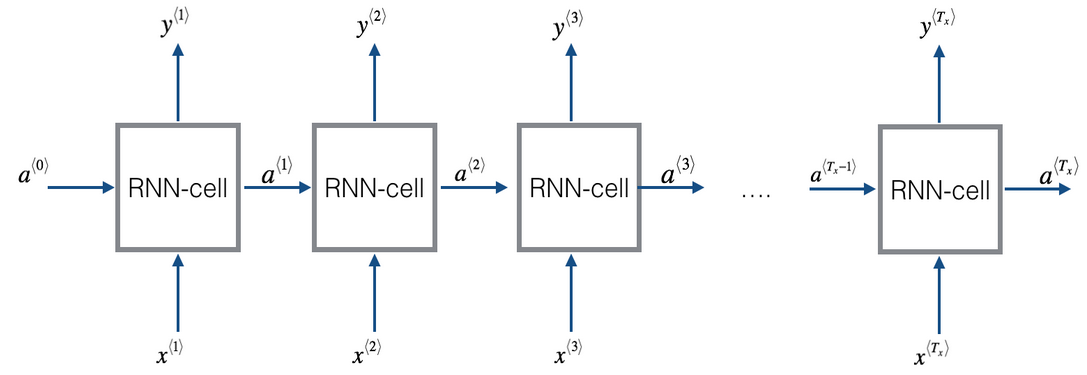

 <a name='ex-1'></a>
#### Exercise 1 - rnn_cell_forward

In [2]:

def rnn_cell_forward(xt, a_prev, parameters):
    """
    Implements a single forward step of the RNN-cell as described in Figure (2)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, a_prev, xt, parameters)
    """
    
    # Retrieve parameters from "parameters"
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    
    ### START CODE HERE ### (≈2 lines)
    # compute next activation state using the formula given above
    a_next = np.tanh(np.dot(Waa ,a_prev) + np.dot(Wax , xt) + ba)
    # compute output of the current cell using the formula given above
    yt_pred = softmax(np.dot(Wya ,a_next) + by)
    ### END CODE HERE ###
    
    # store values you need for backward propagation in cache
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache

np.random.seed(1)

In [3]:
np.random.seed(1)
xt_tmp = np.random.randn(3, 10)
a_prev_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Waa'] = np.random.randn(5, 5)
parameters_tmp['Wax'] = np.random.randn(5, 3)
parameters_tmp['Wya'] = np.random.randn(2, 5)
parameters_tmp['ba'] = np.random.randn(5, 1)
parameters_tmp['by'] = np.random.randn(2, 1)

a_next_tmp, yt_pred_tmp, cache_tmp = rnn_cell_forward(xt_tmp, a_prev_tmp, parameters_tmp)
print("a_next[4] = \n", a_next_tmp[4])
print("a_next.shape = \n", a_next_tmp.shape)
print("yt_pred[1] =\n", yt_pred_tmp[1])
print("yt_pred.shape = \n", yt_pred_tmp.shape)

# UNIT TESTS
rnn_cell_forward_tests(rnn_cell_forward)

a_next[4] = 
 [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape = 
 (5, 10)
yt_pred[1] =
 [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 0.88945212
 0.36920224 0.9966312  0.9982559  0.17746526]
yt_pred.shape = 
 (2, 10)
All tests passed



 <a name='1-2'></a>
 #### 1.2 - RNN Forward Pass 

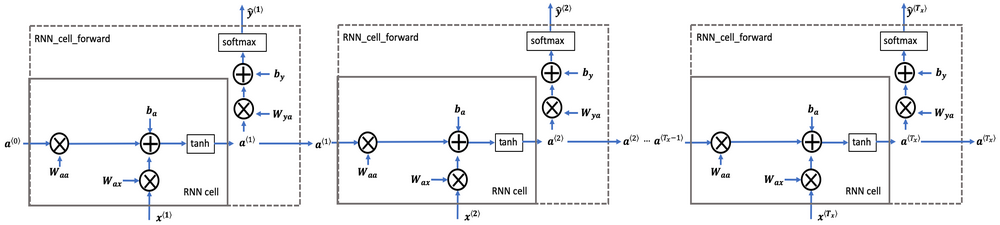

In [4]:
def rnn_forward(x, a0, parameters):
    # Initialize "caches" which will contain the list of all caches
    caches = []
    
    # Retrieve dimensions from shapes of x and parameters["Wya"]
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape
    
    ### START CODE HERE ###
    
    # initialize "a" and "y_pred" with zeros (≈2 lines)
    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((n_y ,m, T_x))
    
    # Initialize a_next (≈1 line)
    a_next = a0
    
    # loop over all time-steps
    for t in range(T_x):
        # Update next hidden state, compute the prediction, get the cache (≈1 line)
        a_next, yt_pred, cache = rnn_cell_forward(x[:,:,t], a_next, parameters)
        # Save the value of the new "next" hidden state in a (≈1 line)
        a[:,:,t] = a_next
        # Save the value of the prediction in y (≈1 line)
        y_pred[:,:,t] = yt_pred
        # Append "cache" to "caches" (≈1 line)
        caches.append(cache)
    ### END CODE HERE ###
    
    # store values needed for backward propagation in cache
    caches = (caches, x)
    
    return a, y_pred, caches

In [5]:
np.random.seed(1)
x_tmp = np.random.randn(3, 10, 4)
a0_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Waa'] = np.random.randn(5, 5)
parameters_tmp['Wax'] = np.random.randn(5, 3)
parameters_tmp['Wya'] = np.random.randn(2, 5)
parameters_tmp['ba'] = np.random.randn(5, 1)
parameters_tmp['by'] = np.random.randn(2, 1)

a_tmp, y_pred_tmp, caches_tmp = rnn_forward(x_tmp, a0_tmp, parameters_tmp)
print("a[4][1] = \n", a_tmp[4][1])
print("a.shape = \n", a_tmp.shape)
print("y_pred[1][3] =\n", y_pred_tmp[1][3])
print("y_pred.shape = \n", y_pred_tmp.shape)
print("caches[1][1][3] =\n", caches_tmp[1][1][3])
print("len(caches) = \n", len(caches_tmp))

#UNIT TEST    
rnn_forward_test(rnn_forward)

a[4][1] = 
 [-0.99999375  0.77911235 -0.99861469 -0.99833267]
a.shape = 
 (5, 10, 4)
y_pred[1][3] =
 [0.79560373 0.86224861 0.11118257 0.81515947]
y_pred.shape = 
 (2, 10, 4)
caches[1][1][3] =
 [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) = 
 2
All tests passed


#### 2 - Long Short-Term Memory (LSTM) Network

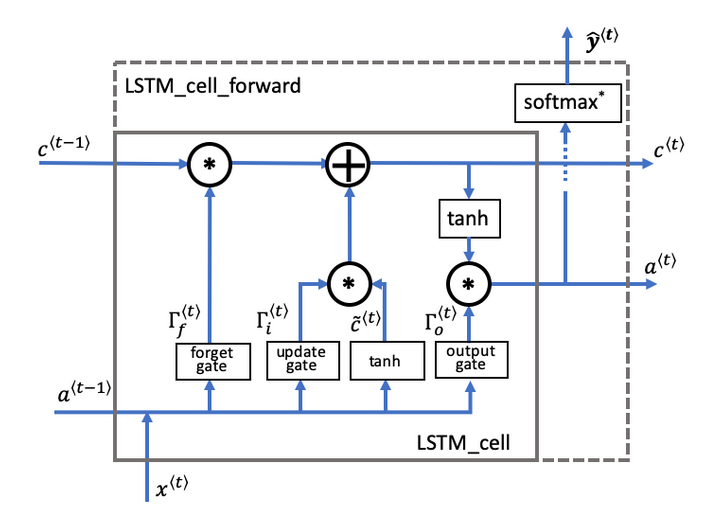

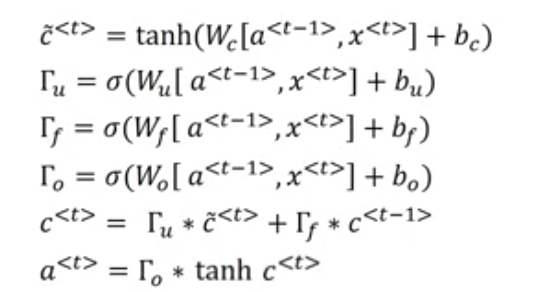

In [10]:
def lstm_cell_forward(xt, a_prev, c_prev, parameters):
    Wf = parameters['Wf'] 
    bf = parameters['bf'] 
    Wi = parameters['Wi'] 
    bi = parameters['bi'] 
    Wo = parameters['Wo'] 
    bo = parameters['bo'] 
    Wc = parameters['Wc'] 
    bc = parameters['bc']
    Wy = parameters['Wy'] 
    by = parameters['by'] 
    
    concat  = np.concatenate([a_prev , xt]) #idee men haad l'exo

    c_tilde = np.tanh(np.dot(Wc,concat) + bc)
    gamma_u  = sigmoid(np.dot(Wi,concat) + bi)
    gamma_f = sigmoid(np.dot(Wf,concat) +bf)
    gamma_o = sigmoid (np.dot(Wo,concat) + bo)
    c = c_prev* gamma_f +c_tilde * gamma_u
    a = gamma_o * np.tanh(c)
    yt_pred = softmax(np.dot(Wy,a) + by)
    cache = (a, c, a_prev, c_prev, gamma_f, gamma_u, c_tilde, gamma_o, xt, parameters)
    return a , c , yt_pred , cache

In [11]:
np.random.seed(1)
xt_tmp = np.random.randn(3, 10)
a_prev_tmp = np.random.randn(5, 10)
c_prev_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Wf'] = np.random.randn(5, 5 + 3)
parameters_tmp['bf'] = np.random.randn(5, 1)
parameters_tmp['Wi'] = np.random.randn(5, 5 + 3)
parameters_tmp['bi'] = np.random.randn(5, 1)
parameters_tmp['Wo'] = np.random.randn(5, 5 + 3)
parameters_tmp['bo'] = np.random.randn(5, 1)
parameters_tmp['Wc'] = np.random.randn(5, 5 + 3)
parameters_tmp['bc'] = np.random.randn(5, 1)
parameters_tmp['Wy'] = np.random.randn(2, 5)
parameters_tmp['by'] = np.random.randn(2, 1)

a_next_tmp, c_next_tmp, yt_tmp, cache_tmp = lstm_cell_forward(xt_tmp, a_prev_tmp, c_prev_tmp, parameters_tmp)

print("a_next[4] = \n", a_next_tmp[4])
print("a_next.shape = ", a_next_tmp.shape)
print("c_next[2] = \n", c_next_tmp[2])
print("c_next.shape = ", c_next_tmp.shape)
print("yt[1] =", yt_tmp[1])
print("yt.shape = ", yt_tmp.shape)
print("cache[1][3] =\n", cache_tmp[1][3])
print("len(cache) = ", len(cache_tmp))

# UNIT TEST
lstm_cell_forward_test(lstm_cell_forward)

a_next[4] = 
 [-0.66408471  0.0036921   0.02088357  0.22834167 -0.85575339  0.00138482
  0.76566531  0.34631421 -0.00215674  0.43827275]
a_next.shape =  (5, 10)
c_next[2] = 
 [ 0.63267805  1.00570849  0.35504474  0.20690913 -1.64566718  0.11832942
  0.76449811 -0.0981561  -0.74348425 -0.26810932]
c_next.shape =  (5, 10)
yt[1] = [0.79913913 0.15986619 0.22412122 0.15606108 0.97057211 0.31146381
 0.00943007 0.12666353 0.39380172 0.07828381]
yt.shape =  (2, 10)
cache[1][3] =
 [-0.16263996  1.03729328  0.72938082 -0.54101719  0.02752074 -0.30821874
  0.07651101 -1.03752894  1.41219977 -0.37647422]
len(cache) =  10
All tests passed


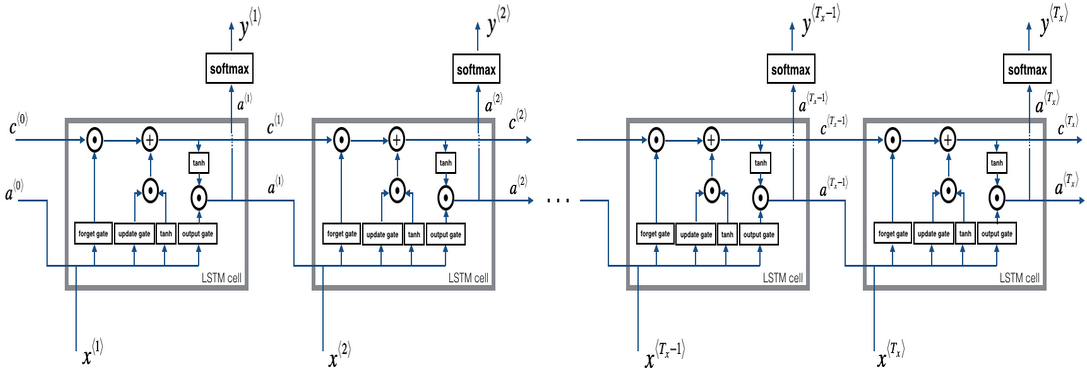

In [29]:
def lstm_forward(x, a0, parameters):
    caches = []
    nx,m ,Tx = x.shape
    ny , na = parameters["Wy"].shape
    a = np.zeros((na,m,Tx))
    c = np.zeros((na,m,Tx))
    y = np.zeros((ny,m,Tx))
    a_t = a0
    c_t = np.zeros((na,m))
    for i in range(Tx) :
        x_t = x[:,:,i]
        a_t , c_t, y_t , cache = lstm_cell_forward(x_t, a_t, c_t, parameters)
        caches.append(cache)
        a[:,:,i] = a_t
        c[:,:,i] = c_t
        y[:,:,i] = y_t
    # store values needed for backward propagation in cache
    caches = (caches, x)
    
    return a,y , c, caches 

In [30]:
np.random.seed(1)
x_tmp = np.random.randn(3, 10, 7)
a0_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Wf'] = np.random.randn(5, 5 + 3)
parameters_tmp['bf'] = np.random.randn(5, 1)
parameters_tmp['Wi'] = np.random.randn(5, 5 + 3)
parameters_tmp['bi']= np.random.randn(5, 1)
parameters_tmp['Wo'] = np.random.randn(5, 5 + 3)
parameters_tmp['bo'] = np.random.randn(5, 1)
parameters_tmp['Wc'] = np.random.randn(5, 5 + 3)
parameters_tmp['bc'] = np.random.randn(5, 1)
parameters_tmp['Wy'] = np.random.randn(2, 5)
parameters_tmp['by'] = np.random.randn(2, 1)

a_tmp, y_tmp, c_tmp, caches_tmp = lstm_forward(x_tmp, a0_tmp, parameters_tmp)
print("a[4][3][6] = ", a_tmp[4][3][6])
print("a.shape = ", a_tmp.shape)
print("y[1][4][3] =", y_tmp[1][4][3])
print("y.shape = ", y_tmp.shape)
print("caches[1][1][1] =\n", caches_tmp[1][1][1])
print("c[1][2][1]", c_tmp[1][2][1])
print("len(caches) = ", len(caches_tmp))

# UNIT TEST    
lstm_forward_test(lstm_forward)

a[4][3][6] =  0.1721177675329167
a.shape =  (5, 10, 7)
y[1][4][3] = 0.9508734618501101
y.shape =  (2, 10, 7)
caches[1][1][1] =
 [ 0.82797464  0.23009474  0.76201118 -0.22232814 -0.20075807  0.18656139
  0.41005165]
c[1][2][1] -0.8555449167181983
len(caches) =  2
All tests passed


#### 3 - Backpropagation in Recurrent Neural Networks 

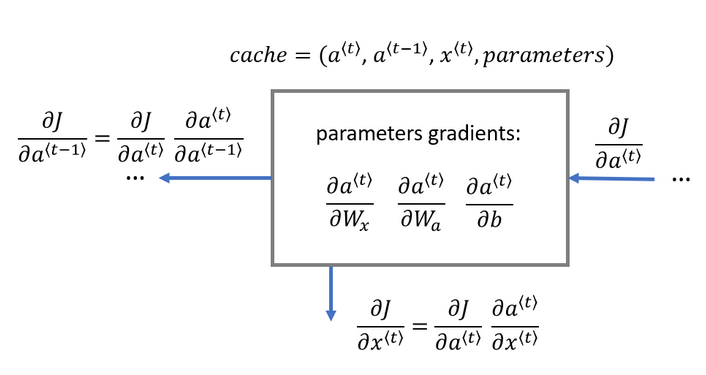
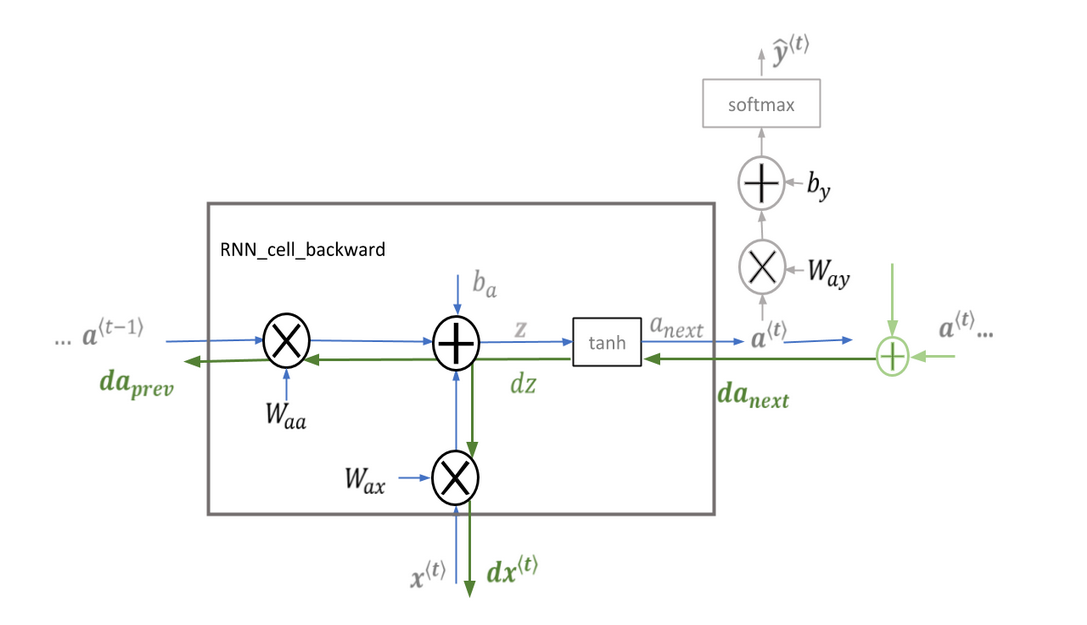

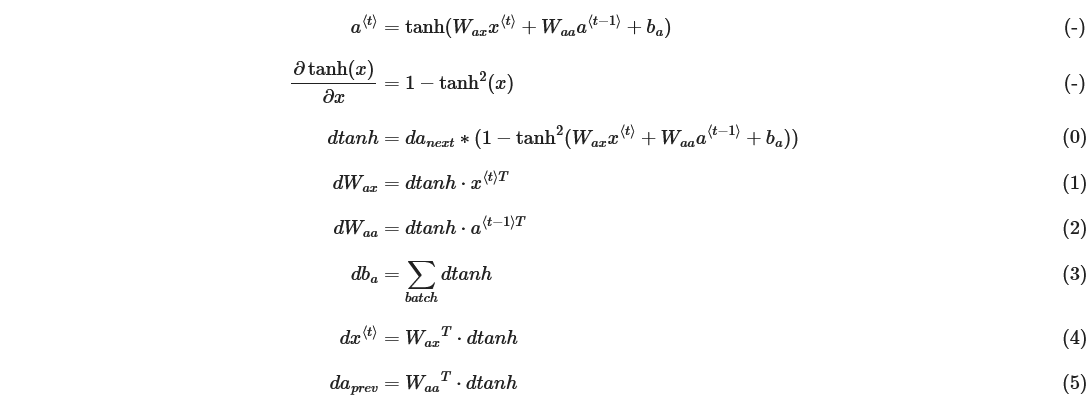

In [41]:
def rnn_cell_backward(da_next,cache):
    (a_next, a_prev, x_t, parameters) = cache
    W_ax = parameters["Wax"]
    W_aa = parameters["Waa"]
    b_a = parameters["ba"]
    a_t = np.tanh(np.dot(W_ax,x_t) + np.dot(W_aa , a_prev) + b_a)
    d_tanh =  da_next * (1 -  np.square(a_next))
    dWax = np.dot(d_tanh , np.transpose(x_t))
    dWaa = np.dot(d_tanh , np.transpose(a_prev))
    dba  = np.sum(d_tanh ,axis=-1, keepdims=True)
    dxt = np.dot (np.transpose(W_ax),d_tanh)
    da_prev = np.dot (np.transpose(W_aa),d_tanh)
    gradients =  {"dxt": dxt, "da_prev": da_prev, "dWax": dWax, "dWaa": dWaa, "dba": dba}
    return gradients



In [42]:
np.random.seed(1)
xt_tmp = np.random.randn(3,10)
a_prev_tmp = np.random.randn(5,10)
parameters_tmp = {}
parameters_tmp['Wax'] = np.random.randn(5,3)
parameters_tmp['Waa'] = np.random.randn(5,5)
parameters_tmp['Wya'] = np.random.randn(2,5)
parameters_tmp['ba'] = np.random.randn(5,1)
parameters_tmp['by'] = np.random.randn(2,1)

a_next_tmp, yt_tmp, cache_tmp = rnn_cell_forward(xt_tmp, a_prev_tmp, parameters_tmp)

da_next_tmp = np.random.randn(5,10)
gradients_tmp = rnn_cell_backward(da_next_tmp, cache_tmp)
print("gradients[\"dxt\"][1][2] =", gradients_tmp["dxt"][1][2])
print("gradients[\"dxt\"].shape =", gradients_tmp["dxt"].shape)
print("gradients[\"da_prev\"][2][3] =", gradients_tmp["da_prev"][2][3])
print("gradients[\"da_prev\"].shape =", gradients_tmp["da_prev"].shape)
print("gradients[\"dWax\"][3][1] =", gradients_tmp["dWax"][3][1])
print("gradients[\"dWax\"].shape =", gradients_tmp["dWax"].shape)
print("gradients[\"dWaa\"][1][2] =", gradients_tmp["dWaa"][1][2])
print("gradients[\"dWaa\"].shape =", gradients_tmp["dWaa"].shape)
print("gradients[\"dba\"][4] =", gradients_tmp["dba"][4])
print("gradients[\"dba\"].shape =", gradients_tmp["dba"].shape)

gradients["dxt"][1][2] = -1.3872130506020928
gradients["dxt"].shape = (3, 10)
gradients["da_prev"][2][3] = -0.1523994937739543
gradients["da_prev"].shape = (5, 10)
gradients["dWax"][3][1] = 0.41077282493545836
gradients["dWax"].shape = (5, 3)
gradients["dWaa"][1][2] = 1.1503450668497135
gradients["dWaa"].shape = (5, 5)
gradients["dba"][4] = [0.20023491]
gradients["dba"].shape = (5, 1)
